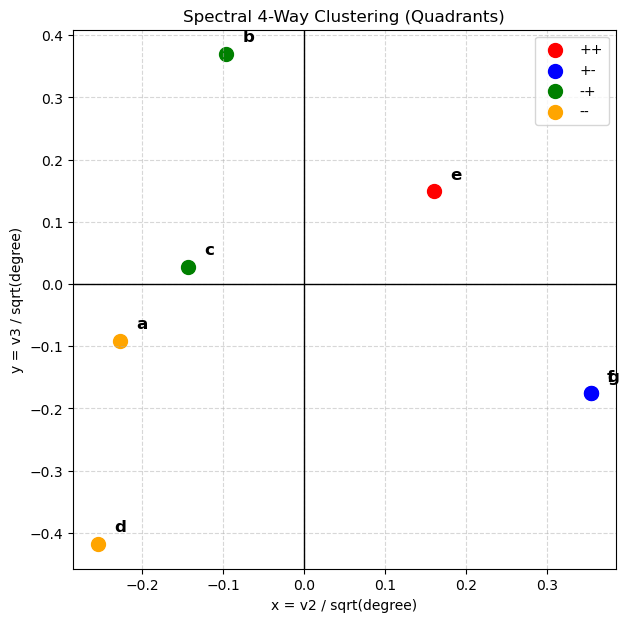

Spectral 4-way clustering (quadrants):
++: ['e']
+-: ['f', 'g']
-+: ['b', 'c']
--: ['a', 'd']


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from scipy.linalg import eigh

# Edges
edges = [
    ("a","b"), ("b","c"), ("c","d"), ("d","a"), ("a","c"),
    ("e","f"), ("f","g"), ("e","g"), ("c","e"), ("b","e")
]

# Step 1: Collect all nodes
nodes = sorted(set(sum(([u, v] for u, v in edges), [])))
index = {n: i for i, n in enumerate(nodes)}
n = len(nodes)

# Step 2: Build adjacency matrix
A = np.zeros((n, n))
for u, v in edges:
    i, j = index[u], index[v]
    A[i, j] = 1
    A[j, i] = 1

# Step 3: Normalized Laplacian
L = csgraph.laplacian(A, normed=True)

# Step 4: Eigen-decomposition
eigvals, eigvecs = eigh(L)

# Take 2nd and 3rd eigenvectors
v2 = eigvecs[:, 1]
v3 = eigvecs[:, 2]

# Degree normalization (1/sqrt(d))
degrees = np.sum(A, axis=1)
x = v2 / np.sqrt(degrees)
y = v3 / np.sqrt(degrees)

# Step 5: Assign to quadrants
clusters = {"++": [], "+-": [], "-+": [], "--": []}
for i, node in enumerate(nodes):
    if x[i] >= 0 and y[i] >= 0:
        clusters["++"].append(node)
    elif x[i] >= 0 and y[i] < 0:
        clusters["+-"].append(node)
    elif x[i] < 0 and y[i] >= 0:
        clusters["-+"].append(node)
    else:
        clusters["--"].append(node)

# Step 6: Plot with quadrants
plt.figure(figsize=(7,7))
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

colors = {"++":"red", "+-":"blue", "-+":"green", "--":"orange"}
for quad, nodes_in_quad in clusters.items():
    for node in nodes_in_quad:
        i = index[node]
        plt.scatter(x[i], y[i], color=colors[quad], s=100, label=quad if node == nodes_in_quad[0] else "")
        plt.text(x[i]+0.02, y[i]+0.02, node, fontsize=12, weight="bold")

plt.xlabel("x = v2 / sqrt(degree)")
plt.ylabel("y = v3 / sqrt(degree)")
plt.title("Spectral 4-Way Clustering (Quadrants)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Print clusters
print("Spectral 4-way clustering (quadrants):")
for k, v in clusters.items():
    print(f"{k}: {v}")
